In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

ipos = pd.read_csv('SCOOP-Rating-Performance-2021.csv')
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633 entries, 0 to 3632
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Trade Date                3633 non-null   object 
 1   Issuer                    3633 non-null   object 
 2   Symbol                    3633 non-null   object 
 3   Lead/Joint-Lead Managers  3633 non-null   object 
 4   Offer Price               3633 non-null   object 
 5   Opening Price             3633 non-null   object 
 6   1st Day Close             3633 non-null   object 
 7   1st Day % Px Chng         3632 non-null   object 
 8   $ Change Opening          3633 non-null   float64
 9   $ Change Close            3633 non-null   float64
 10  Star Ratings              3633 non-null   object 
 11  Performed                 407 non-null    object 
dtypes: float64(2), object(10)
memory usage: 340.7+ KB


In [6]:
# change data to appropriate datatype
ipos['Trade Date'] = pd.to_datetime(ipos['Trade Date'])

def remove_dollar_sign(col_name):
    for i in range(len(ipos[col_name])):
        num = ipos.at[i,col_name]
        ipos.at[i,col_name] = num.replace("$","").strip()
        
remove_dollar_sign('Offer Price')
remove_dollar_sign('Opening Price')
remove_dollar_sign('1st Day Close')

ipos['Offer Price'] = ipos['Offer Price'].astype('float')
ipos['Opening Price'] = ipos['Opening Price'].astype('float')
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float')

def remove_percent_sign(col_name):
    for i in range(len(ipos[col_name])):
        price_str = ipos.at[i,col_name]
        if not isinstance(price_str,float):
            ipos.at[i,col_name] = price_str.replace("%","").strip()

remove_percent_sign('1st Day % Px Chng')

# 1.不用除以100
# 2. column 名称有点乱 统一为open close等！
ipos['1st Day % Px Chng'] = ipos['1st Day % Px Chng'].astype('float')/100

# convert 'Star Ratings' into integer value
def replace_nc(col_name):
    for i in range(len(ipos[col_name])):
        empty_str = ipos.at[i,col_name]
        if ('NC' in empty_str) or ('N/C' in empty_str):
            ipos.at[i,col_name] = '0'

replace_nc('Star Ratings')
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')
ipos['Issuer'] = ipos['Issuer'].astype('string')

# find the empty value in column '1st Day % Px Chng'

In [7]:
ipos.describe()

,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings
count,3633.000000,3633.000000,3633.000000,3632.000000,3633.000000,3633.000000,3633.000000
mean,14.435252,16.546642,16.801324,0.135873,2.113053,2.370215,1.764657
std,6.331923,9.337989,9.926846,0.285963,4.741063,5.695513,0.905773
min,0.000000,0.650000,0.650000,-0.410800,-6.850000,-6.340000,0.000000
25%,10.000000,10.050000,10.050000,0.000000,0.000000,0.000000,1.000000
50%,14.000000,14.800000,14.900000,0.038500,0.440000,0.500000,1.000000
75%,18.000000,20.200000,20.500000,0.195725,2.500000,3.000000,3.000000
max,91.000000,120.000000,132.990000,3.538500,65.000000,95.540000,5.000000


In [8]:
# 加注释
import math
def find_nan(col_name):
    for i in range(len(ipos[col_name])):
        value = ipos.at[i,col_name]
        if math.isnan(value):
            return i
            
print(find_nan('1st Day % Px Chng'))

'''
i = 532
nan value in '1st Day % Px Chng' because offer price equals 0 and the division results in infinite value
So the outlier is dropped
'''

ipos.drop(532, axis=0, inplace=True)
ipos.info()

532
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3632 entries, 0 to 3632
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Trade Date                3632 non-null   datetime64[ns]
 1   Issuer                    3632 non-null   string        
 2   Symbol                    3632 non-null   object        
 3   Lead/Joint-Lead Managers  3632 non-null   object        
 4   Offer Price               3632 non-null   float64       
 5   Opening Price             3632 non-null   float64       
 6   1st Day Close             3632 non-null   float64       
 7   1st Day % Px Chng         3632 non-null   float64       
 8   $ Change Opening          3632 non-null   float64       
 9   $ Change Close            3632 non-null   float64       
 10  Star Ratings              3632 non-null   int32         
 11  Performed                 407 non-null    object        
dtypes: datetime64[ns

In [9]:
ipos.drop(['Performed'],axis=1,inplace=True)

# to check if there were outliers, for example, drop 99% in first day of trading
ipos.describe()

,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings
count,3632.000000,3632.000000,3632.000000,3632.000000,3632.000000,3632.000000,3632.000000
mean,14.439226,16.550933,16.805727,0.135873,2.113370,2.370644,1.765143
std,6.328260,9.335691,9.924665,0.285963,4.741678,5.696238,0.905424
min,0.000000,0.650000,0.650000,-0.410800,-6.850000,-6.340000,0.000000
25%,10.000000,10.050000,10.050000,0.000000,0.000000,0.000000,1.000000
50%,14.000000,14.800000,14.900000,0.038500,0.440000,0.500000,1.000000
75%,18.000000,20.210000,20.500000,0.195725,2.500000,3.000000,3.000000
max,91.000000,120.000000,132.990000,3.538500,65.000000,95.540000,5.000000


In [10]:
# ipos.sort_values(by='Trade Date',inplace=True)
# ipos

In [11]:
# Add Column '$ Change Open to Close'
# Add Column '% Change Open to Close'
ipos['$ Change Open to Close'] = ipos['1st Day Close']-ipos['Opening Price']
ipos['% Change Open to Close'] = np.divide(ipos['$ Change Open to Close'],ipos['Opening Price'])

ipos

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,$ Change Open to Close,% Change Open to Close
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.00,14.75,12.75,-0.0893,0.75,-1.25,2,-2.00,-0.135593
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.00,11.03,11.63,0.0573,0.03,0.63,1,0.60,0.054397
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.50,13.50,13.50,0.0000,0.00,0.00,1,0.00,0.000000
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.00,13.85,13.51,0.0392,0.85,0.51,1,-0.34,-0.024549
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.00,10.52,10.45,0.0450,0.52,0.45,1,-0.07,-0.006654
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628,2000-12-08,Specialty Laboratories,SP,Merrill Lynch,16.00,21.94,23.31,0.4570,5.94,7.31,3,1.37,0.062443
3629,2000-12-08,W.P. Stewart & Co.,WPL,Goldman Sachs/Lazard,20.00,22.06,24.50,0.2250,2.06,4.50,2,2.44,0.110607
3630,2000-12-11,Gemplus,GEMP,Credit Suisse First Boston,10.69,12.00,13.38,0.2512,1.31,2.69,1,1.38,0.115000
3631,2000-12-12,GenVec,GNVC,J.P. Morgan,9.50,10.56,9.88,0.0395,1.06,0.38,2,-0.68,-0.064394


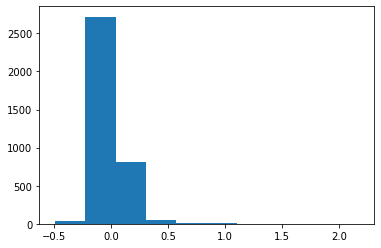

In [12]:
'''
print ipos after sorted based on '% Change Open to Close'
Plot histogram for '% Change Open to Close'
'''
ipos = ipos.sort_values(by='% Change Open to Close')
plt.hist(ipos['% Change Open to Close'])
plt.show()

In [13]:
'''
Extract Lead Manager from 'Lead/Joint-Lead Managers'
'''

ipos['Lead Manager'] = ipos['Lead/Joint-Lead Managers'].map(lambda x: x.split('/')[0])
# delete the space
ipos['Lead Manager'] = ipos['Lead Manager'].map(lambda x: x.strip())

count = 0
# display all lead managers
for i in pd.DataFrame(ipos['Lead Manager'].unique(), columns=['Name']).sort_values('Name')['Name']:
    print(i)
    count += 1
print(count)

A.G. Edwards
A.G. Edwards & Sons
A.G. Edwrads & Sons
AG Edwards
AG Edwards & Sons
AG Edwrads
AMTD
AMTD Global Markets
Adams Harkness
Advest
Aegis Capital
Aegis Capital Corp
Aegis Capital Corp.
Alexander Capital
Anderson & Strudrick
Axiom
Axiom Capital Management
B. Riley FBR
BB&T Capital Markets
BBVA
BMN Nesbitt Burns
BMO Capital Markets
BTIG
Baird
Baird, BMO Capital Markets, Janney Montgomery Scott
Banc of America
Banc of America Securities
Barclay Capital
Barclays
Barclays Capital
Bear Stearns
Bear Streans
Bear, Stearns
Benchmark
Benchmark Company
BoA Merrill Lynch
BofA
BofA Merril Lynch
BofA Merrill Lych
BofA Merrill Lync
BofA Merrill Lynch
BofA Securities
Boustead Securities
Broadband Capital Management
Broadband Capital Management LLC
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CE Unterberg Towbin
CIBC Capital Markets
CIBC World Markets
CIBC Worldwide
CICC
CRT Capital
CRT Capital Group
CS First Boston
CSFB
CSFirst Boston
Canaccord Genuity
Cantor
Cantor Fitzgerald
Cantor Fitzger

In [14]:
# match the lead managers
ipos.loc[ipos['Lead Manager'].str.contains('Hambrecht'),'Lead Manager'] = 'WR Hambrecht+Co.'
ipos.loc[ipos['Lead Manager'].str.contains('Edwards'), 'Lead Manager'] = 'AG Edwards'
ipos.loc[ipos['Lead Manager'].str.contains('Edwrads'), 'Lead Manager'] = 'AG Edwards'
ipos.loc[ipos['Lead Manager'].str.contains('Barclay'), 'Lead Manager'] = 'Barclays'
ipos.loc[ipos['Lead Manager'].str.contains('Aegis'), 'Lead Manager'] = 'Aegis Capital'
ipos.loc[ipos['Lead Manager'].str.contains('Deutsche'), 'Lead Manager'] = 'Deutsche Bank'
ipos.loc[ipos['Lead Manager'].str.contains('Suisse'), 'Lead Manager'] = 'CSFB'
ipos.loc[ipos['Lead Manager'].str.contains('CS.?F'), 'Lead Manager'] = 'CSFB'
ipos.loc[ipos['Lead Manager'].str.contains('^Early'), 'Lead Manager'] = 'EarlyBirdCapital'
# ipos.loc[325,'Lead Manager'] = 'Maximum Captial'
ipos.loc[ipos['Lead Manager'].str.contains('Keefe'), 'Lead Manager'] = 'Keefe, Bruyette & Woods'
ipos.loc[ipos['Lead Manager'].str.contains('Stan'), 'Lead Manager'] = 'Morgan Stanley'
ipos.loc[ipos['Lead Manager'].str.contains('P. Morg'), 'Lead Manager'] = 'JP Morgan'
ipos.loc[ipos['Lead Manager'].str.contains('PM'), 'Lead Manager'] = 'JP Morgan'
ipos.loc[ipos['Lead Manager'].str.contains('J\.P\.'), 'Lead Manager'] = 'JP Morgan'
ipos.loc[ipos['Lead Manager'].str.contains('Banc of'), 'Lead Manager'] = 'Banc of America'
ipos.loc[ipos['Lead Manager'].str.contains('Lych'), 'Lead Manager'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Manager'].str.contains('Merrill$'), 'Lead Manager'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Manager'].str.contains('Lymch'), 'Lead Manager'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Manager'].str.contains('A Merril Lynch'), 'Lead Manager'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Manager'].str.contains('Merril '), 'Lead Manager'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Manager'].str.contains('BofA$'), 'Lead Manager'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Manager'].str.contains('SANDLER'), 'Lead Manager'] = 'Sandler O\'neil + Partners'
ipos.loc[ipos['Lead Manager'].str.contains('Sandler'), 'Lead Manager'] = 'Sandler O\'Neil + Partners'
ipos.loc[ipos['Lead Manager'].str.contains('Renshaw'), 'Lead Manager'] = 'Rodman & Renshaw'
ipos.loc[ipos['Lead Manager'].str.contains('Baird'), 'Lead Manager'] = 'RW Baird'
ipos.loc[ipos['Lead Manager'].str.contains('Cantor'), 'Lead Manager'] = 'Cantor Fitzgerald'
ipos.loc[ipos['Lead Manager'].str.contains('Goldman'), 'Lead Manager'] = 'Goldman Sachs'
ipos.loc[ipos['Lead Manager'].str.contains('Bear'), 'Lead Manager'] = 'Bear Stearns'
ipos.loc[ipos['Lead Manager'].str.contains('BoA'), 'Lead Manager'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Manager'].str.contains('Broadband'), 'Lead Manager'] = 'Broadband Capital'
ipos.loc[ipos['Lead Manager'].str.contains('Davidson'), 'Lead Manager'] = 'DA Davidson'
ipos.loc[ipos['Lead Manager'].str.contains('Feltl'), 'Lead Manager'] = 'Feltl & Co.'
ipos.loc[ipos['Lead Manager'].str.contains('China'), 'Lead Manager'] = 'China International'
ipos.loc[ipos['Lead Manager'].str.contains('Cit'), 'Lead Manager'] = 'Citigroup'
ipos.loc[ipos['Lead Manager'].str.contains('Ferris'), 'Lead Manager'] = 'Ferris Baker Watts'
ipos.loc[ipos['Lead Manager'].str.contains('Friedman|Freidman|FBR'), 'Lead Manager'] = 'Friedman Billings Ramsey'
ipos.loc[ipos['Lead Manager'].str.contains('^I-'), 'Lead Manager'] = 'I-Bankers'
ipos.loc[ipos['Lead Manager'].str.contains('Gunn'), 'Lead Manager'] = 'Gunn Allen'
ipos.loc[ipos['Lead Manager'].str.contains('Jeffer'), 'Lead Manager'] = 'Jefferies'
ipos.loc[ipos['Lead Manager'].str.contains('Oppen'), 'Lead Manager'] = 'Oppenheimer'
ipos.loc[ipos['Lead Manager'].str.contains('JMP'), 'Lead Manager'] = 'JMP Securities'
ipos.loc[ipos['Lead Manager'].str.contains('Rice'), 'Lead Manager'] = 'Johnson Rice'
ipos.loc[ipos['Lead Manager'].str.contains('Ladenburg'), 'Lead Manager'] = 'Ladenburg Thalmann'
ipos.loc[ipos['Lead Manager'].str.contains('Piper'), 'Lead Manager'] = 'Piper Jaffray'
ipos.loc[ipos['Lead Manager'].str.contains('Pali'), 'Lead Manager'] = 'Pali Capital'
ipos.loc[ipos['Lead Manager'].str.contains('Paulson'), 'Lead Manager'] = 'Paulson Investment Co.'
ipos.loc[ipos['Lead Manager'].str.contains('Roth'), 'Lead Manager'] = 'Roth Capital'
ipos.loc[ipos['Lead Manager'].str.contains('Stifel'), 'Lead Manager'] = 'Stifel Nicolaus'
ipos.loc[ipos['Lead Manager'].str.contains('SunTrust'), 'Lead Manager'] = 'SunTrust Robinson'
ipos.loc[ipos['Lead Manager'].str.contains('Wachovia'), 'Lead Manager'] = 'Wachovia'
ipos.loc[ipos['Lead Manager'].str.contains('Wedbush'), 'Lead Manager'] = 'Wedbush Morgan'
ipos.loc[ipos['Lead Manager'].str.contains('Blair'), 'Lead Manager'] = 'William Blair'
ipos.loc[ipos['Lead Manager'].str.contains('Wunderlich'), 'Lead Manager'] = 'Wunderlich'
ipos.loc[ipos['Lead Manager'].str.contains('Max'), 'Lead Manager'] = 'Maxim Group'
ipos.loc[ipos['Lead Manager'].str.contains('CIBC'), 'Lead Manager'] = 'CIBC'
ipos.loc[ipos['Lead Manager'].str.contains('CRT'), 'Lead Manager'] = 'CRT Capital'
ipos.loc[ipos['Lead Manager'].str.contains('HCF'),'Lead Manager'] = 'HCFP Brenner'
ipos.loc[ipos['Lead Manager'].str.contains('Cohen'), 'Lead Manager']  = 'Cohen & Co.'
ipos.loc[ipos['Lead Manager'].str.contains('Cowen'), 'Lead Manager'] = 'Cowen & Co.'
ipos.loc[ipos['Lead Manager'].str.contains('Leerink'), 'Lead Manager']  = 'Leerink Partners'
ipos.loc[ipos['Lead Manager'].str.contains('Lynch\xca'), 'Lead Manager'] = 'Merrill Lynch'

In [15]:
count = 0
# display all lead managers
for i in pd.DataFrame(ipos['Lead Manager'].unique(), columns=['Name']).sort_values('Name')['Name']:
    print(i)
    count += 1
print(count)

AG Edwards
AMTD
AMTD Global Markets
Adams Harkness
Advest
Aegis Capital
Alexander Capital
Anderson & Strudrick
Axiom
Axiom Capital Management
BB&T Capital Markets
BBVA
BMN Nesbitt Burns
BMO Capital Markets
BTIG
Banc of America
Barclays
Bear Stearns
Benchmark
Benchmark Company
BofA Merrill Lync
BofA Merrill Lynch
BofA Securities
Boustead Securities
Broadband Capital
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CE Unterberg Towbin
CIBC
CICC
CRT Capital
CSFB
Canaccord Genuity
Cantor Fitzgerald
Capital Growth Financial
Casimir Capital
Chardan
Chardan Capital Markets
Chase H&Q
China International
Citigroup
Cohen & Co.
Cowen & Co.
Craig-Hallum Capital
Craig-Hallum Capital Group
Credit Suiss
DA Davidson
DBAB
DLJ
DPO (Direct Public Offering)
Dain Rauscher Wessels
Dawson James Securities
Deutsche Bank
Donald
Donaldson Lufkin & Jenrette
Donaldson, Lufkin & Jenrette
Dougherty & Company
EarlyBirdCapital
Equity Securities
Evercore ISI
FIG Partners
FTN Midwest Securities
Feltl & Co.
Ferris Baker W

In [16]:
# Add column for "Total Underwriters" for each IPO list
ipos['Total Underwriters'] = ipos['Lead/Joint-Lead Managers'].map(lambda x: len(x.split("/")))

# Add column for "Gap Open Pct" for percentage difference with ''$ Change Opening' and 'Opening Price'
ipos['Gap Open Pct'] = ipos['$ Change Opening']/ipos['Opening Price']

# Add column for "Open to Close Pct" for percentage difference with '$ Change Close'- ''$ Change Opening' and 'Opening Price'
ipos['Open to Close Pct'] = (ipos['$ Change Close'] - ipos['$ Change Opening'])/ipos['Opening Price']
ipos.sort_values(by='Trade Date',inplace=True)
ipos = ipos.reset_index(drop=True)
ipos

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,$ Change Open to Close,% Change Open to Close,Lead Manager,Total Underwriters,Gap Open Pct,Open to Close Pct
0,2000-05-12,Sequoia Software,SQSW,Lehman Brothers,8.0,10.25,10.06,0.2578,2.25,2.06,2,-0.19,-0.018537,Lehman Brothers,1,0.219512,-0.018537
1,2000-05-18,iBEAM Broadcasting,IBEM,Morgan Stanley Dean Witter,10.0,11.50,14.00,0.4000,1.50,4.00,2,2.50,0.217391,Morgan Stanley,1,0.130435,0.217391
2,2000-05-18,New Focus,NUFO,Credit Suisse First Boston,20.0,40.00,51.00,1.5500,20.00,31.00,3,11.00,0.275000,CSFB,1,0.500000,0.275000
3,2000-05-18,Nogatech,NGTC,W.R. Hambrecht+Co,12.0,11.88,9.41,-0.2161,-0.13,-2.59,1,-2.47,-0.207912,WR Hambrecht+Co.,1,-0.010943,-0.207071
4,2000-05-18,US Unwired,UNWR,Donaldson Lufkin & Jenrette,11.0,11.03,11.06,0.0057,0.03,0.06,1,0.03,0.002720,Donaldson Lufkin & Jenrette,1,0.002720,0.002720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3627,2020-09-10,NavSight Holdings,NSH.U,Credit Suisse,10.0,10.00,10.00,0.0000,0.00,0.00,1,0.00,0.000000,CSFB,1,0.000000,0.000000
3628,2020-09-11,Broadstone Acquisition,BSN.U,Citigroup,10.0,9.84,9.60,-0.0400,-0.16,-0.40,1,-0.24,-0.024390,Citigroup,1,-0.016260,-0.024390
3629,2020-09-11,TWC Tech Holdings II,TWCTU,Citigroup/ Deutsche Bank Securities,10.0,10.08,10.07,0.0070,0.08,0.07,1,-0.01,-0.000992,Citigroup,2,0.007937,-0.000992
3630,2020-09-11,Ribbit LEAP,LEAP.U,JPMorgan,10.0,11.20,11.55,0.1553,1.20,1.55,1,0.35,0.031250,JP Morgan,1,0.107143,0.031250


In [17]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3632 entries, 0 to 3631
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Trade Date                3632 non-null   datetime64[ns]
 1   Issuer                    3632 non-null   string        
 2   Symbol                    3632 non-null   object        
 3   Lead/Joint-Lead Managers  3632 non-null   object        
 4   Offer Price               3632 non-null   float64       
 5   Opening Price             3632 non-null   float64       
 6   1st Day Close             3632 non-null   float64       
 7   1st Day % Px Chng         3632 non-null   float64       
 8   $ Change Opening          3632 non-null   float64       
 9   $ Change Close            3632 non-null   float64       
 10  Star Ratings              3632 non-null   int32         
 11  $ Change Open to Close    3632 non-null   float64       
 12  % Change Open to Clo

In [18]:
# find the first data
for i in range(len(ipos['Trade Date'])):
    if ipos.at[i,'Trade Date'] > pd.Timestamp('2006-01-01'):
        print(i)
        break

print(ipos.at[952,'Trade Date'])

952
2006-01-12 00:00:00


In [19]:
# Load S&P 500 Index data
# import pandas as pd
sp500 = pd.read_csv('S&P500-15y.csv')
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3702 entries, 0 to 3701
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3702 non-null   object
 1   Close   3702 non-null   object
 2   Open    3702 non-null   object
 3   High    3702 non-null   object
 4   Low     3702 non-null   object
 5   Volume  3702 non-null   object
 6   Change  3702 non-null   object
dtypes: object(7)
memory usage: 202.6+ KB


In [20]:
# Convert data into the appropriate format

# remove comma in the data
def remove_comma(col_name):
    for i in range(len(sp500[col_name])):
        num = sp500.at[i,col_name]
        if ',' in num:
            sp500.at[i,col_name] = num.replace(",","").strip()

remove_comma('Close')
remove_comma('Open')
remove_comma('High')
remove_comma('Low')
   
# remove percentage sign
def remove_percent_sign(col_name):
    for i in range(len(sp500[col_name])):
        num = sp500.at[i,col_name]
        if not isinstance(num,float):
            sp500.at[i,col_name] = num.replace("%","").strip()

remove_percent_sign('Change')

sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500['Close'] = sp500['Close'].astype('float')
sp500['Open'] = sp500['Open'].astype('float')
sp500['High'] = sp500['High'].astype('float')
sp500['Low'] = sp500['Low'].astype('float')
sp500['Change'] = sp500['Change'].astype('float')/100

# drop the columns 'Volume'
sp500.drop(['Volume'],axis=1,inplace=True)

sp500

,Date,Close,Open,High,Low,Change
0,2020-09-18,3319.47,3357.38,3362.27,3292.40,-0.0112
1,2020-09-17,3357.01,3346.86,3375.17,3328.82,-0.0084
2,2020-09-16,3385.49,3411.23,3428.92,3384.45,-0.0046
3,2020-09-15,3401.20,3407.73,3419.48,3389.25,0.0052
4,2020-09-14,3383.54,3363.56,3402.93,3363.56,0.0127
...,...,...,...,...,...,...
3697,2006-01-10,1289.69,1290.15,1290.15,1283.76,-0.0004
3698,2006-01-09,1290.15,1285.45,1290.78,1284.82,0.0037
3699,2006-01-06,1285.45,1273.48,1286.09,1273.48,0.0094
3700,2006-01-05,1273.48,1273.46,1276.91,1270.30,0.0000


In [21]:
sp500.sort_values(by='Date',inplace=True)
sp500 = sp500.reset_index(drop=True)

In [22]:
sp500

,Date,Close,Open,High,Low,Change
0,2006-01-04,1273.46,1268.80,1275.37,1267.74,0.0037
1,2006-01-05,1273.48,1273.46,1276.91,1270.30,0.0000
2,2006-01-06,1285.45,1273.48,1286.09,1273.48,0.0094
3,2006-01-09,1290.15,1285.45,1290.78,1284.82,0.0037
4,2006-01-10,1289.69,1290.15,1290.15,1283.76,-0.0004
...,...,...,...,...,...,...
3697,2020-09-14,3383.54,3363.56,3402.93,3363.56,0.0127
3698,2020-09-15,3401.20,3407.73,3419.48,3389.25,0.0052
3699,2020-09-16,3385.49,3411.23,3428.92,3384.45,-0.0046
3700,2020-09-17,3357.01,3346.86,3375.17,3328.82,-0.0084


In [23]:
# filter the data of which the trade date is after 2005
ipos_15y = ipos[952:]
ipos_15y

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,$ Change Open to Close,% Change Open to Close,Lead Manager,Total Underwriters,Gap Open Pct,Open to Close Pct
952,2006-01-12,Linn Energy LLC,LINE,RBC Capital Markets/Lehman Brothers,21.0,25.10,22.00,0.0476,4.10,1.00,2,-3.10,-0.123506,RBC Capital Markets,2,0.163347,-0.123506
953,2006-01-18,Western Refining,WNR,Banc of America/Deutsche Bank,17.0,19.00,18.59,0.0935,2.00,1.59,3,-0.41,-0.021579,Banc of America,2,0.105263,-0.021579
954,2006-01-19,American Railcar Industries,ARII,UBS Investment Bank/Bear Stearns,21.0,23.07,22.96,0.0931,2.07,1.96,3,-0.11,-0.004768,UBS Investment Bank,2,0.089727,-0.004768
955,2006-01-24,Argyle Security Acquisition,ARGLU,Rodman & Renshaw/I-Bankers,8.0,8.00,7.95,-0.0062,0.00,-0.05,1,-0.05,-0.006250,Rodman & Renshaw,2,0.000000,-0.006250
956,2006-01-25,Highbury Financial,HBRYU,ThinkEquity Partners/EarlyBirdCapital,6.0,6.00,6.00,0.0000,0.00,0.00,1,0.00,0.000000,ThinkEquity Partners,2,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3627,2020-09-10,NavSight Holdings,NSH.U,Credit Suisse,10.0,10.00,10.00,0.0000,0.00,0.00,1,0.00,0.000000,CSFB,1,0.000000,0.000000
3628,2020-09-11,Broadstone Acquisition,BSN.U,Citigroup,10.0,9.84,9.60,-0.0400,-0.16,-0.40,1,-0.24,-0.024390,Citigroup,1,-0.016260,-0.024390
3629,2020-09-11,TWC Tech Holdings II,TWCTU,Citigroup/ Deutsche Bank Securities,10.0,10.08,10.07,0.0070,0.08,0.07,1,-0.01,-0.000992,Citigroup,2,0.007937,-0.000992
3630,2020-09-11,Ribbit LEAP,LEAP.U,JPMorgan,10.0,11.20,11.55,0.1553,1.20,1.55,1,0.35,0.031250,JP Morgan,1,0.107143,0.031250


In [24]:
# Calculate week change percentage from SP dataset
'''
Take the closing price of the S&P 500 yesterday as a percent of its close seven days ago
(Because broad market performance over the past week would be a logical influence on a stock, let's add this to our DataFrame) 
[Note: Your data may contain a few error, you need to double check and fix the error that was found.]
'''
def get_week_chg_pct(ipo_dt):

    try:
        day_ago_idx = sp500[sp500['Date']==str(ipo_dt.date())].index[0] + 1
        week_ago_idx = sp500[sp500['Date']==str(ipo_dt.date())].index[0] + 5
        chg_pct = (sp500.iloc[day_ago_idx]['Close'] - sp500.iloc[week_ago_idx]['Close'])/(sp500.iloc[week_ago_idx]['Close'])
        return chg_pct * 100
    except:
        print('error', ipo_dt.date())
ipos_15y['SP Week Change'] = ipos_15y['Trade Date'].map(get_week_chg_pct)

error 2009-08-01
error 2013-11-16
error 2015-02-21
error 2015-02-21
error 2019-02-24


d:\anaconda\anaconda2020\envs\python36\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [25]:
# Calculate S&P close to open change percentage

'''
Add the S&P 500 percentage change from the close the previous day of the IPO to the next day's opening of the IPO 
as new column to IPOScoop data 
(S&P week change, S&P week change percentage, and S&P close to open change percentage).
'''
def get_close2open_chg_pct(ipo_dt):

    try:
        close_idx = sp500[sp500['Date']==str(ipo_dt.date())].index[0] + 1
        open_idx = sp500[sp500['Date']==str(ipo_dt.date())].index[0]
        chg = (sp500.iloc[open_idx]['Open'] - sp500.iloc[close_idx]['Close'])/(sp500.iloc[close_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt.date())
ipos_15y['SP Close to Open'] = ipos_15y['Trade Date'].map(get_close2open_chg_pct)

error 2009-08-01
error 2013-11-16
error 2015-02-21
error 2015-02-21
error 2019-02-24


d:\anaconda\anaconda2020\envs\python36\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [26]:
ipos_15y.loc[ipos_15y['Trade Date']=="2019-02-24"]

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,$ Change Open to Close,% Change Open to Close,Lead Manager,Total Underwriters,Gap Open Pct,Open to Close Pct,SP Week Change,SP Close to Open
3223,2019-02-24,TCR2 Therapeutic,TCRR,Jefferies/ Leerink Partners/ BMO Capital Markets,15.0,15.15,15.07,0.0047,0.15,0.07,1,-0.08,-0.005281,Jefferies,3,0.009901,-0.005281,NaN,NaN


In [27]:
ipos_15y.loc[ipos_15y['Trade Date']=="2015-02-21"]

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,$ Change Open to Close,% Change Open to Close,Lead Manager,Total Underwriters,Gap Open Pct,Open to Close Pct,SP Week Change,SP Close to Open
2547,2015-02-21,Community Healthcare Trust,CHCT,Sandler ONeill + Partners/ SunTrust Robinson H...,19.0,19.00,19.75,0.0395,0.00,0.75,1,0.75,0.039474,Sandler O'Neil + Partners,2,0.00000,0.039474,NaN,NaN
2548,2015-02-21,Baozun,BZUN,Morgan Stanley/ Credit Suisse/ BofA Merrill Lynch,10.0,10.25,10.44,0.0440,0.25,0.44,1,0.19,0.018537,Morgan Stanley,3,0.02439,0.018537,NaN,NaN


In [28]:
ipos_15y.loc[ipos_15y['Trade Date']=="2013-11-16"]

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,$ Change Open to Close,% Change Open to Close,Lead Manager,Total Underwriters,Gap Open Pct,Open to Close Pct,SP Week Change,SP Close to Open
2213,2013-11-16,Wix.com Ltd.,WIX,J.P. Morgan/ BofA Merrill Lynch/ RBC Capital M...,16.5,18.5,16.31,-0.0115,2.0,-0.19,3,-2.19,-0.118378,JP Morgan,3,0.108108,-0.118378,NaN,NaN


In [29]:
ipos_15y.loc[ipos_15y['Trade Date']=="2009-08-01"]

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,$ Change Open to Close,% Change Open to Close,Lead Manager,Total Underwriters,Gap Open Pct,Open to Close Pct,SP Week Change,SP Close to Open
1507,2009-08-01,Emdeon,EM,Morgan Stanley,15.0,17.5,16.52,0.1013,2.5,1.52,3,-0.98,-0.056,Morgan Stanley,1,0.142857,-0.056,NaN,NaN


In [30]:
ipos_15y.loc[1507, 'Trade Date'] = pd.to_datetime('2009-08-12')
ipos_15y.loc[2213, 'Trade Date'] = pd.to_datetime('2013-11-06')
ipos_15y.loc[2547, 'Trade Date'] = pd.to_datetime('2015-05-21')
ipos_15y.loc[2548, 'Trade Date'] = pd.to_datetime('2015-05-21')
ipos_15y.loc[3223, 'Trade Date'] = pd.to_datetime('2019-05-13')

ipos_15y['SP Week Change'] = ipos_15y['Trade Date'].map(get_week_chg_pct)
ipos_15y['SP Close to Open'] = ipos_15y['Trade Date'].map(get_close2open_chg_pct)

d:\anaconda\anaconda2020\envs\python36\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
d:\anaconda\anaconda2020\envs\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
d:\anaconda\anaconda2020\envs\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [31]:
ipos_15y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680 entries, 952 to 3631
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Trade Date                2680 non-null   datetime64[ns]
 1   Issuer                    2680 non-null   string        
 2   Symbol                    2680 non-null   object        
 3   Lead/Joint-Lead Managers  2680 non-null   object        
 4   Offer Price               2680 non-null   float64       
 5   Opening Price             2680 non-null   float64       
 6   1st Day Close             2680 non-null   float64       
 7   1st Day % Px Chng         2680 non-null   float64       
 8   $ Change Opening          2680 non-null   float64       
 9   $ Change Close            2680 non-null   float64       
 10  Star Ratings              2680 non-null   int32         
 11  $ Change Open to Close    2680 non-null   float64       
 12  % Change Open to C

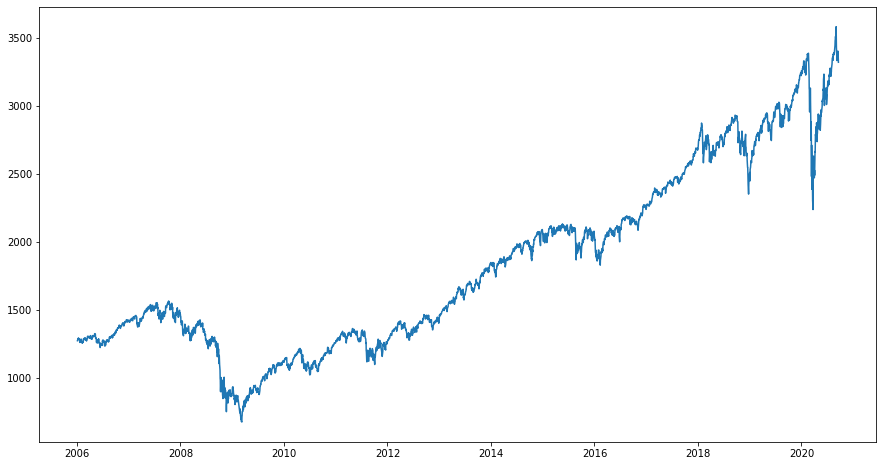

In [39]:
# Plot 'Close' vs All Date of the S&P 500 INDEX

date = sp500['Date']
close = sp500['Close']
plt.figure(figsize=(15,8))
plt.plot(date,close)
plt.show()

In [40]:
# One-hot Encode data: Star Ratings, Lead Managers

# 存放提取后的特征
ratingsDF = pd.DataFrame()
# 独热编码
ratingsDF = pd.get_dummies(ipos_15y['Star Ratings'], prefix='Ratings')
ratingsDF.head()

# 存放提取后的特征
managerDF = pd.DataFrame()
#独热编码
managerDF = pd.get_dummies(ipos_15y['Lead Manager'])

# ipos1 = pd.concat([ipos['Total Underwriters'], ipos['Trade Date']],axis=1)

In [41]:
ratingsDF

,Ratings_0,Ratings_1,Ratings_2,Ratings_3,Ratings_4
952,0,0,1,0,0
953,0,0,0,1,0
954,0,0,0,1,0
955,0,1,0,0,0
956,0,1,0,0,0
...,...,...,...,...,...
3627,0,1,0,0,0
3628,0,1,0,0,0
3629,0,1,0,0,0
3630,0,1,0,0,0


In [42]:
# 把月份和星期专门挑出来训练
ipos_15y['Trade Month'] = ipos['Trade Date'].map(lambda x: x.month)

# add a column that represents the day of the week as an integer
ipos_15y['Trade Day'] = ipos['Trade Date'].map(lambda x: x.weekday())

d:\anaconda\anaconda2020\envs\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\anaconda\anaconda2020\envs\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [43]:
corrDF = ipos_15y.corr()
corrDF['1st Day Close'].sort_values(ascending=False)

1st Day Close             1.000000
Opening Price             0.974915
Offer Price               0.869440
$ Change Close            0.792036
$ Change Opening          0.778896
1st Day % Px Chng         0.646188
Star Ratings              0.593372
Gap Open Pct              0.589408
$ Change Open to Close    0.294189
Total Underwriters        0.289666
% Change Open to Close    0.197000
Open to Close Pct         0.192484
Trade Day                 0.074672
Trade Month               0.007782
SP Week Change           -0.018947
SP Close to Open         -0.031133
Name: 1st Day Close, dtype: float64

In [44]:
# extracted = pd.concat([ipos_15y['Trade Month'], ipos_15y['Trade Day'], ipos_15y['Offer Price'], 
#                        ipos_15y['Opening Price'], ipos_15y['$ Change Opening'], ipos_15y['Gap Open Pct'], 
#                        ipos_15y['SP Close to Open'] + ipos_15y['SP Week Change'],
#                        managerDF, ratingsDF],axis=1)

extracted = pd.concat([ipos_15y['Trade Month'], ipos_15y['Trade Day'], ipos_15y['Offer Price'], 
                       ipos_15y['Opening Price'], ipos_15y['$ Change Opening'], ipos_15y['Gap Open Pct'], 
                       ipos_15y['SP Close to Open'], ipos_15y['SP Week Change'],
                       managerDF, ratingsDF],axis=1)


extracted.shape

(2680, 139)

In [45]:
extracted = extracted.reset_index(drop=True)
extracted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680 entries, 0 to 2679
Columns: 139 entries, Trade Month to Ratings_4
dtypes: float64(6), int64(2), uint8(131)
memory usage: 510.5 KB


In [57]:
# ipos.drop(['Performed'],axis=1,inplace=True)
# idx = 2143
# X_train = extracted[0:idx]
# X_test = extracted[idx:]

from sklearn.model_selection import train_test_split
y = ipos_15y['$ Change Open to Close'].map(lambda x: 1 if x >= .25 else 0)

def split_dataset(X,y):
    return train_test_split(X,y,test_size=0.2)

# invest in the IPO if close price - open price >= 0.25
# y_train = ipos_15y['$ Change Open to Close'][0:idx].map(lambda x: 1 if x >= .25 else 0)
# # y_train = ipos_15y['% Change Open to Close'][0:idx].map(lambda x: 1 if x >= .15)
# y_test = ipos_15y['$ Change Open to Close'][idx:].map(lambda x: 1 if x >= .25 else 0)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lr = linear_model.LogisticRegression(max_iter=2000)
rfc = RandomForestClassifier(n_estimators=200)
def SVCkernel():
    return Pipeline(
        [
            ("std_canler",StandardScaler()),
            ("kernelsvc",SVC(kernel="rbf",gamma='scale',C=1))
            
        ]
    )
svm = SVCkernel()

In [80]:
lr_acc, lr_precision, lr_recall, lr_f1 = [], [], [], []
rfc_acc, rfc_precision, rfc_recall, rfc_f1 = [], [], [], []
svm_acc, svm_precision, svm_recall, svm_f1 = [], [], [], []

for i in range(0,20):
    X_train,X_test, y_train, y_test = split_dataset(extracted, y)
    
    '''logistic regression'''
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)
    
    lr_acc.append(accuracy_score(y_test, lr_pred))
    lr_precision.append(precision_score(y_test, lr_pred, average=None)[0])
    lr_recall.append(recall_score(y_test, lr_pred, average=None)[0])
    lr_f1.append(f1_score(y_test, lr_pred, average=None)[0])
    
    '''random forest classifier'''
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    
    rfc_acc.append(accuracy_score(y_test, rfc_pred))
    rfc_precision.append(precision_score(y_test, rfc_pred, average=None)[0])
    rfc_recall.append(recall_score(y_test, rfc_pred, average=None)[0])
    rfc_f1.append(f1_score(y_test, rfc_pred, average=None)[0])
    
    '''svm'''
    svm.fit(X_train,y_train)
    svm_pred = svm.predict(X_test)
    
    svm_acc.append(accuracy_score(y_test, svm_pred))
    svm_precision.append(precision_score(y_test, svm_pred, average=None)[0])
    svm_recall.append(recall_score(y_test, svm_pred, average=None)[0])
    svm_f1.append(f1_score(y_test, svm_pred, average=None)[0])

    
# lr_pred = lr.predict(X_test)
# p = np.mean(lr_pred == y_test)

In [81]:
lr_acc = np.mean(lr_acc)
lr_precision = np.mean(lr_precision)
lr_recall = np.mean(lr_recall)
lr_f1 = np.mean(lr_f1)

rfc_acc = np.mean(rfc_acc)
rfc_precision = np.mean(rfc_precision)
rfc_recall = np.mean(rfc_recall)
rfc_f1 = np.mean(rfc_f1)

svm_acc = np.mean(svm_acc)
svm_precision = np.mean(svm_precision)
svm_recall = np.mean(svm_recall)
svm_f1 = np.mean(svm_f1)

In [72]:
# print(lr_acc)
# print(lr_precision)
# print(lr_recall)
# print(lr_f1)

0.6787313432835822
0.6961616621565928
0.9452671108011093
0.8015501635925781


In [85]:
pd.DataFrame.from_records([[lr_acc, lr_precision, lr_recall, lr_f1], 
                           [rfc_acc, rfc_precision, rfc_recall, rfc_f1],
                           [svm_acc, svm_precision, svm_recall, svm_f1]], 
                          columns=['Accuracy', 'Precision','Recall','F1'], 
                          index=['Logistic Regression', 'Random Forest', 'SVM classifier'])

,Accuracy,Precision,Recall,F1
Logistic Regression,0.672388,0.691826,0.940209,0.796972
Random Forest,0.654011,0.696835,0.875340,0.775820
SVM classifier,0.680784,0.685149,0.987199,0.808815


In [174]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)

# n_estimators=100

In [175]:
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
p = np.mean(rfc_pred == y_test)
print(p)

0.6231343283582089


In [198]:
# SVM classifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
def SVCkernel():
    return Pipeline(
        [
            ("std_canler",StandardScaler()),
            ("kernelsvc",SVC(kernel="rbf",gamma='scale',C=1))
            
        ]
    )

In [199]:
svm=SVCkernel()
svm.fit(X_train,y_train)
# plot_decision_boundary(clf,axis=([-1,2.5,-1,1.5]))
svm_pred = svm.predict(X_test)
p = np.mean(svm_pred == y_test)
print(p)

0.710820895522388


In [101]:
'''
Price and percent Change for open and close price (identify if there is bad data point, 
for example, drop 99% in first day of trading, try to correct and regenerate data) 
[note: can use .describe() to generate a description info]
'''

# 选出整体最优分类器 重点介绍
# 提出假设：XXX classifier在验证指标上整体最优：引用领域+具体解决问题；
# 搜索分类器评价指标
# 写清楚代码说明

'\nPrice and percent Change for open and close price (identify if there is bad data point, \nfor example, drop 99% in first day of trading, try to correct and regenerate data) \n[note: can use .describe() to generate a description info]\n'

In [83]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, lr_pred, labels=None, sample_weight=None)
cm_rfc = confusion_matrix(y_test, rfc_pred, labels=None, sample_weight=None)
cm_svm = confusion_matrix(y_test, svm_pred, labels=None, sample_weight=None)

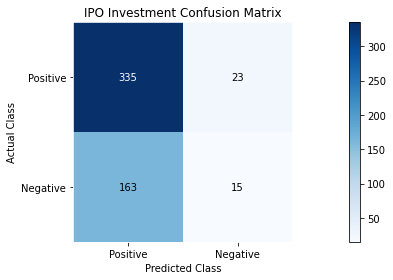

In [88]:
# confusion matrix visualization

import itertools

import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, normalize=False, title='IPO Investment Confusion Matrix', cmap=plt.cm.Blues):
    
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
#     plt.xticks([])  # 去掉横坐标值
#     plt.yticks([])  # 去掉纵坐标值


    plt.axis("equal")

    ax = plt.gca()
    left, right = plt.xlim()
    ax.spines['left'].set_position(('data', left))
    ax.spines['right'].set_position(('data', right))
    for edge_i in ['top', 'bottom', 'right', 'left']:
        ax.spines[edge_i].set_edgecolor("white")
        

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        num = '{:.2f}'.format(cm[i, j]) if normalize else int(cm[i, j])
        plt.text(j, i, num,
                 verticalalignment='center',
                 horizontalalignment="center",
                 color="white" if num > thresh else "black")
    
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.xticks(np.arange(cm.shape[0]), ['Positive', 'Negative'])
    plt.yticks(np.arange(cm.shape[0]), ['Positive', 'Negative'])
    
    plt.tight_layout()

    plt.savefig('cm.png', transparent=True, dpi=800) 
    
    plt.show()


plot_confusion_matrix(cm_lr)

# plot_confusion_matrix(cm_rfc)

# plot_confusion_matrix(cm_svm)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_acc = accuracy_score(y_test, lr_pred)
rfc_acc = accuracy_score(y_test, rfc_pred)
svm_acc = accuracy_score(y_test, svm_pred)

lr_precision = precision_score(y_test, lr_pred, average=None)
rfc_precision = precision_score(y_test, rfc_pred, average=None)
svm_precision = precision_score(y_test, svm_pred, average=None)
 
lr_recall = recall_score(y_test, lr_pred, average=None)
rfc_recall = recall_score(y_test, rfc_pred, average=None)
svm_recall = recall_score(y_test, svm_pred, average=None)

lr_f1 = f1_score(y_test, lr_pred, average=None)
rfc_f1 = f1_score(y_test, rfc_pred, average=None)
svm_f1 = f1_score(y_test, svm_pred, average=None)

In [45]:
'''
2. 数据收集问题
4. 答辩
   主题内容
   股票基本知识介绍，研究目的和意义
   方法+结果
''' 

# 分析选取特征的合理性 引用参考文献
# 标普

'\n2. 数据收集问题\n4. 答辩\n   主题内容\n   股票基本知识介绍，研究目的和意义\n   方法+结果\n'

**price** 
# price